## EDA Florida State

In this script, we are going to focus on understanding trends in the Gastronomic shops located in the state of Florida.
In particular, it will be of interest to identify:

+ Most frequent Gastronomic shops
+ Categories with higher number of reviews (then, probably higher number of customers)
+ Categories with higher and lower Average Rating scores
+ Categories with higher percentage of Perpetualy closed state.

#### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import ast

### Load Florida-Reviews

In [ ]:
folder_path = './review-Florida/'
dfmerge = pd.DataFrame()

for file_name in os.listdir(folder_path):
    if file_name.endswith('.json'):
        file_path = os.path.join(folder_path, file_name)
        dfaux = pd.read_json(file_path, lines=True)
        dfmerge = pd.concat([dfmerge, dfaux], ignore_index=True)

C:\Users\carna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\carna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\carna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\carna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encou

In [ ]:
dfmerge.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.014719e+20,Julie A. Gerber,1628003250740,1,Update: Their “reply” to my review amounted to...,None,"{'time': 1627042799532, 'text': 'Thank you for...",0x8893863ea87bd5dd:0x9383ebf973e74abb
1,1.154772e+20,Martin Sheffield,1595031217005,5,He's a knowledgeable doctor but the way he run...,None,"{'time': 1582464056733, 'text': 'Thank you for...",0x8893863ea87bd5dd:0x9383ebf973e74abb
2,1.018050e+20,Brian Truett,1522924253567,5,"Best doctor I've ever had, I never wait to be ...",None,None,0x8893863ea87bd5dd:0x9383ebf973e74abb
3,1.063444e+20,Tina Sun,1467907819586,1,I was told he is a good doctor. I was trying t...,None,None,0x8893863ea87bd5dd:0x9383ebf973e74abb
4,1.008751e+20,James Haynes,1480683415081,5,Takes the time to actually get to know his pat...,None,None,0x8893863ea87bd5dd:0x9383ebf973e74abb


In [ ]:
# Get the gmaps_ids of all unique shops in the dataset
Florida_gmap_id = dfmerge['gmap_id'].unique()
Florida_gmap_id

array(['0x8893863ea87bd5dd:0x9383ebf973e74abb',
       '0x88c33f1c8e1f99a3:0x99b22c5bd258b3a7',
       '0x88c33c2935058dd3:0xb888c702ecf5aef6', ...,
       '0x88d903a5a1ec65a1:0x9e44682bff7be2c7',
       '0x88d9b297e990ba8f:0x814c58a8c0123622',
       '0x88c313d4ed64b857:0x2bc265e33c753434'], dtype=object)

In [ ]:
# Get the number of total unique shops in Florida
len(Florida_gmap_id)

59200

### Load Metadata-Sitios

In [ ]:
folder_path = './metadata-sitios/'
dfmeta = pd.DataFrame()

for file_name in os.listdir(folder_path):
    if file_name.endswith('.json'):
        file_path = os.path.join(folder_path, file_name)
        dfaux = pd.read_json(file_path, lines=True)
        dfmeta = pd.concat([dfmeta, dfaux], ignore_index=True)

In [ ]:
dfmeta.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


In [ ]:
# Filter the DataFrame based on Florida's ids
df_filtered = dfmeta[dfmeta['gmap_id'].isin(Florida_gmap_id)]

df_filtered.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
105,"Brian Shaheen, MD","Brian Shaheen, MD, 2421 Thomas Dr, Panama City...",0x8893863ea87bd5dd:0x9383ebf973e74abb,None,30.159982,-85.752277,"[Family practice physician, General practitioner]",4.2,18,None,"[[Thursday, 8AM–5PM], [Friday, 8AM–5PM], [Satu...","{'Service options': ['Online care'], 'Accessib...",Open ⋅ Closes 5PM,"[0x88938ebfbd53f9c5:0xf6e52004f37523c8, 0x8893...",https://www.google.com/maps/place//data=!4m2!3...
117,Mail Station,"Mail Station, 8466 Lockwood Ridge Rd, Sarasota...",0x88c33f1c8e1f99a3:0x99b22c5bd258b3a7,None,27.389683,-82.508387,"[Mailing service, Courier service, Fax service...",3.4,28,None,"[[Thursday, 8AM–5PM], [Friday, 8AM–5PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 5PM,"[0x88c3475a64b98c03:0xe8de19a19dae1b2c, 0x88c3...",https://www.google.com/maps/place//data=!4m2!3...
118,APC Pediatrics,"APC Pediatrics, 5255 Office Park Blvd 110 & 11...",0x88c33c2935058dd3:0xb888c702ecf5aef6,None,27.448302,-82.510850,"[Pediatrician, Children's hospital, Doctor]",4.2,34,None,"[[Thursday, 8AM–5PM], [Friday, 8AM–5PM], [Satu...","{'Service options': ['Online care'], 'Health &...",Open ⋅ Closes 5PM,"[0x88c33e113c201abb:0x49ef8b29737f8773, 0x88c3...",https://www.google.com/maps/place//data=!4m2!3...
119,Infinia Accounting,"Infinia Accounting, 555 W. Granada Blvd Ste Bl...",0x88d908b8c02dc3bb:0xea94b1fb47b68ef6,None,29.280410,-81.071481,"[Tax preparation service, Accountant, Payroll ...",5.0,13,None,"[[Thursday, 10AM–5PM], [Friday, 10AM–4PM], [Sa...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 5PM,"[0x88e6dc9fd184eed9:0x81252448cc728aa8, 0x88e6...",https://www.google.com/maps/place//data=!4m2!3...
120,Baker Distributing Company,"Baker Distributing Company, 7810 25th Ct E #11...",0x88c33fb303dc8e69:0x3485e731f1a704f8,None,27.401269,-82.532346,"[Air conditioning system supplier, Air filter ...",4.3,8,None,"[[Thursday, 7:30AM–5PM], [Friday, 7:30AM–5PM],...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 5PM,"[0x88c33e46cf5434ad:0x8772f525f32cc2d2, 0x88c3...",https://www.google.com/maps/place//data=!4m2!3...


#### Analyze Nan values in the columns of interest

In [ ]:

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60032 entries, 105 to 2743117
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              60032 non-null  object 
 1   address           58984 non-null  object 
 2   gmap_id           60032 non-null  object 
 3   description       7436 non-null   object 
 4   latitude          60032 non-null  float64
 5   longitude         60032 non-null  float64
 6   category          59999 non-null  object 
 7   avg_rating        60032 non-null  float64
 8   num_of_reviews    60032 non-null  int64  
 9   price             7072 non-null   object 
 10  hours             52303 non-null  object 
 11  MISC              53543 non-null  object 
 12  state             52863 non-null  object 
 13  relative_results  56716 non-null  object 
 14  url               60032 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 7.3+ MB


In [ ]:
# As there are few shops without tags, they are going to be dropped
df_filtered = df_filtered.dropna(subset=['category'])

#### Filter Gastronomic associated Shops

In [ ]:
# Define the list of gastronomic tags to filter on
gastronomic_tags = ['food', 'restaurant', 'cafe', 'bar', 'pub', 'bakery']  # replace with your actual list of tags


# Use a nested loop to check if any of the gastronomic tags are in the category list for each row
is_gastronomic = []
for categories in df_filtered['category']:
    found_tag = False
    for tag in categories:
        if tag.lower() in gastronomic_tags:
            found_tag = True
            break
    is_gastronomic.append(found_tag)

# Filter the DataFrame based on this condition
dfFlorida_gastronomic = df_filtered[is_gastronomic]

dfFlorida_gastronomic.head()

NameError: name 'df_filtered' is not defined

In [ ]:
dfFlorida_gastronomic.to_csv('Florida_gastronimic_df.csv')

In [ ]:

dfFlorida_gastronomic = pd.read_csv('./Florida_gastronimic_df.csv')

dfFlorida_gastronomic = dfFlorida_gastronomic.drop('Unnamed: 0', axis=1)
# Use the apply() method to convert the category column to a list of strings
dfFlorida_gastronomic['category'] = dfFlorida_gastronomic['category'].apply(lambda x: ast.literal_eval(x))

dfFlorida_gastronomic.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Oneyda's Bakery,"Oneyda's Bakery, 600 Goodlette-Frank Rd #101, ...",0x88dae191ee505917:0x6ba3e25388d3fad4,NaN,26.154754,-81.790528,"['Bakery', 'Deli']",4.6,19,$,"[['Thursday', '8AM–6PM'], ['Friday', '8AM–6PM'...",{'Service options': ['Delivery']},Permanently closed,"['0x88dae1997e122d6b:0xfd776fa851f06d29', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
1,"Daily Dose Craft Bar, Inc.","Daily Dose Craft Bar, Inc., 11643 Beach Blvd U...",0x88e5b53b107a2609:0x40106d3b48960d9d,NaN,30.287836,-81.517501,"['Coffee shop', 'Bubble tea store', 'Cafe']",5.0,27,NaN,"[['Thursday', '10AM–8PM'], ['Friday', '10AM–8P...",{'From the business': ['Identifies as women-le...,Closed ⋅ Opens 10AM,NaN,https://www.google.com/maps/place//data=!4m2!3...
2,Gormley's on the river | Modern cuisine in his...,Gormley's on the river | Modern cuisine in his...,0x8894b5a7a7909725:0xe4687299fd288188,NaN,29.726949,-84.981535,"['Modern French restaurant', 'Restaurant']",4.3,17,NaN,"[['Thursday', '5–9PM'], ['Friday', '5–10PM'], ...",{'Service options': ['Delivery']},Permanently closed,"['0x8894b5a649e1f5cb:0xe5ef826dc2f3842f', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
3,Bachata Rosa,"Bachata Rosa, 887w W 29th St, Hialeah, FL 33012",0x88d9ba5d65937567:0xbc27649cf513cc89,NaN,25.848173,-80.299773,['Restaurant'],3.6,8,NaN,"[['Thursday', '6PM–1AM'], ['Friday', '6PM–1AM'...","{'Service options': ['Dine-in', 'Delivery'], '...",Closed ⋅ Opens 6PM,"['0x88d9b07ccb3270b9:0x844f5431085b8f88', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
4,Zampini's Bottega,"Zampini's Bottega, 510 SE 5th Ave, Fort Lauder...",0x88d900575f0dd065:0x9b3638d2a80be4d,NaN,26.116549,-80.138561,['Restaurant'],4.7,18,NaN,"[['Thursday', '8:30AM–10PM'], ['Friday', '7AM–...","{'Service options': ['Outdoor seating', 'Takeo...",Permanently closed,NaN,https://www.google.com/maps/place//data=!4m2!3...


In [ ]:


# First, create a list of all the gastronomic tags in the df_gastronomic DataFrame
all_tags = []
for categories in dfFlorida_gastronomic['category']:
    categories = [x.lower() for x in categories]
    all_tags.extend(categories)
unique_tags = set(all_tags)

# Then, count the number of times each unique tag appears in the df_gastronomic DataFrame
tag_counts = {}
for tag in unique_tags:
    count = all_tags.count(tag)
    tag_counts[tag] = count

# Sort the tags and their counts in descending order of count
sorted_tags = sorted(tag_counts.items(), key=lambda x: x[1], reverse=True)

# Finally, print the sorted list of unique tags and their counts
for tag, count in sorted_tags:
    print(tag, count)

restaurant 2468
bar 652
fast food restaurant 525
bakery 464
sandwich shop 435
cafe 405
takeout restaurant 401
breakfast restaurant 335
coffee shop 330
caterer 281
american restaurant 276
hamburger restaurant 208
seafood restaurant 167
bar & grill 128
pizza restaurant 112
italian restaurant 105
family restaurant 101
mexican restaurant 88
deli 84
lounge 77
bagel shop 76
steak house 74
sports bar 74
lunch restaurant 73
juice shop 73
convenience store 72
cocktail bar 69
grocery store 65
delivery restaurant 65
gas station 64
donut shop 63
espresso bar 61
night club 60
wine bar 59
vegetarian restaurant 59
supermarket 58
brunch restaurant 58
vegan restaurant 55
latin american restaurant 54
coffee store 54
salad shop 54
cake shop 53
chicken restaurant 52
health food restaurant 51
florist 51
atm 50
chinese restaurant 48
dessert shop 48
pub 48
event venue 47
ice cream shop 47
beer store 46
barbecue restaurant 45
wine store 43
sushi restaurant 43
chicken wings restaurant 41
diner 41
taco restaura

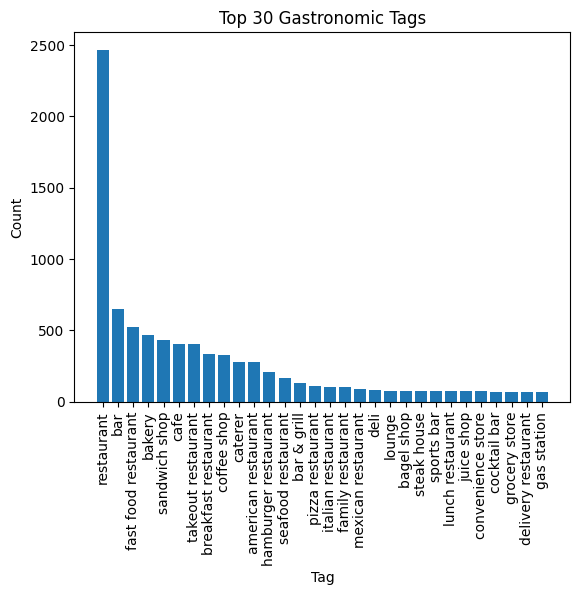

In [ ]:
# Top 30 most frequent categories
Florida_Top30_gastronomic = sorted_tags[:30]

# Finally, generate a bar plot of the top 30 tags
tags = [tag for tag, count in Florida_Top30_gastronomic]
counts = [count for tag, count in Florida_Top30_gastronomic]
fig, ax = plt.subplots()
ax.bar(tags, counts)
ax.set_title('Top 30 Gastronomic Tags')
ax.set_xlabel('Tag')
ax.set_ylabel('Count')
plt.xticks(rotation=90)
plt.show()

It can be appreaciated that there are some big categories like:

+ Restaurant
+ Bar
+ Fast Food restaurant
+ Cafe
+ Bakery

But there are also more specific categories leading such as:
+ Sandwhich Shop
+ Breakfast restaurant
+ Takeout Restaurant
+ Pizza restaurant
+ Seafood restaurant
+ International food ( American, Italian, Mexican)

In [ ]:
import numpy as np

# First, create a dictionary to store the average rating score and number of reviews for each tag
tag_stats = {}
for tag in unique_tags:
    tag_stats[tag] = {'rating_sum': 0, 'num_reviews': 0}

# Then, iterate over the rows in the df_gastronomic DataFrame and update the counters for each tag
for index, row in dfFlorida_gastronomic.iterrows():
    categories = row['category']
    rating = row['avg_rating']
    num_reviews = row['num_of_reviews']
    for tag in categories:

        tag_stats[tag.lower()]['rating_sum'] += rating
        tag_stats[tag.lower()]['num_reviews'] += num_reviews

# Finally, calculate the average rating score and average number of reviews for each tag
for tag in tag_stats:
    tag = tag.lower()
    count = all_tags.count(tag)
    avg_rating = tag_stats[tag]['rating_sum'] / tag_stats[tag]['num_reviews']
    avg_reviews = tag_stats[tag]['num_reviews'] / count
    print(tag, avg_rating, avg_reviews)

hair extension technician 0.04409090909090909 110.0
club 0.04429012345679013 92.57142857142857
health and beauty shop 0.10638297872340426 47.0
discount supermarket 0.002116806937005866 1960.5
souvenir store 0.16428571428571428 28.0
men's clothing store 0.015870307167235496 293.0
movie theater 0.13548387096774195 31.0
eclectic restaurant 0.003923555812943391 1151.1666666666667
gay bar 0.10000000000000002 45.5
tour operator 0.08828828828828829 55.5
argentinian restaurant 0.04156142365097589 108.875
drive-in movie theater 0.192 25.0
seafood market 0.010397794407246948 435.25714285714287
children's party service 0.03277693474962064 131.8
falafel restaurant 0.07758620689655173 58.0
californian restaurant 0.00406352171882298 1070.5
art gallery 0.09230769230769233 52.0
fruit and vegetable store 0.04381443298969072 97.0
bar & grill 0.006217986896962475 655.859375
organic farm 0.09375 48.0
antique store 0.0793103448275862 58.0
chinese restaurant 0.00990375826657347 387.4791666666667
water sport

#### Categories with  higher and lower number of reviews

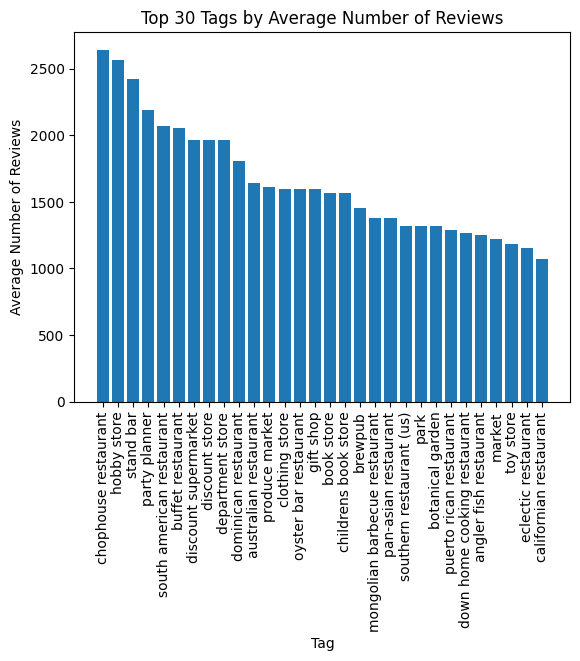

In [ ]:

# First, calculate the average rating score and average number of reviews for each tag
for tag in tag_stats:
    tag = tag.lower()
    count = all_tags.count(tag)
    if count > 0:
        tag_stats[tag]['avg_rating'] = tag_stats[tag]['rating_sum'] / count
        tag_stats[tag]['avg_reviews'] = tag_stats[tag]['num_reviews'] / count
    else:
        tag_stats[tag]['avg_rating'] = np.nan
        tag_stats[tag]['avg_reviews'] = np.nan

# Sort the tags by average number of reviews and get the top 30
sorted_tags_by_reviews = sorted(tag_stats.items(), key=lambda x: x[1]['avg_reviews'], reverse=True)[:30]

# Generate a bar plot of the top 30 tags sorted by average number of reviews
tags_by_reviews = [tag for tag, stats in sorted_tags_by_reviews]
avg_reviews_by_tag = [stats['avg_reviews'] for tag, stats in sorted_tags_by_reviews]
fig, ax = plt.subplots()
ax.bar(tags_by_reviews, avg_reviews_by_tag)
ax.set_title('Top 30 Tags by Average Number of Reviews')
ax.set_xlabel('Tag')
ax.set_ylabel('Average Number of Reviews')
plt.xticks(rotation=90)
plt.show()


It must be highlighted the high number or reviews that international restaurant get:

+ South american
+ Dominican
+ Australian
+ Mongolian
+ Pan-Asian
+ Puerto Rico



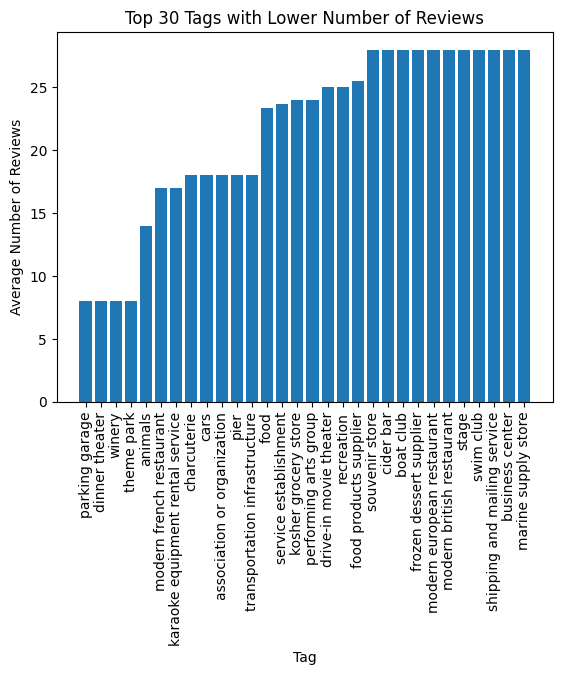

In [ ]:
# Sort the tags by average number of reviews and get the top 30
sorted_tags_by_reviews = sorted(tag_stats.items(), key=lambda x: x[1]['avg_reviews'], reverse=False)[:30]

# Generate a bar plot of the top 30 tags sorted by average number of reviews
tags_by_reviews = [tag for tag, stats in sorted_tags_by_reviews]
avg_reviews_by_tag = [stats['avg_reviews'] for tag, stats in sorted_tags_by_reviews]
fig, ax = plt.subplots()
ax.bar(tags_by_reviews, avg_reviews_by_tag)
ax.set_title('Top 30 Tags with Lower Number of Reviews')
ax.set_xlabel('Tag')
ax.set_ylabel('Average Number of Reviews')
plt.xticks(rotation=90)
plt.show()

On the other hand, it can be seen that places with shows do not attract people:

+ Dinner theaters
+ Karaoke bars
+ Performing art spaces
+ Recreation spaces
+ Driven-in movie theaters

Additionally, european food is not of interest:

+ French restaurants
+ British restaurants
+ Scandinavian restaurants
+ European restaurants
+

#### Categories with higher and lower scores

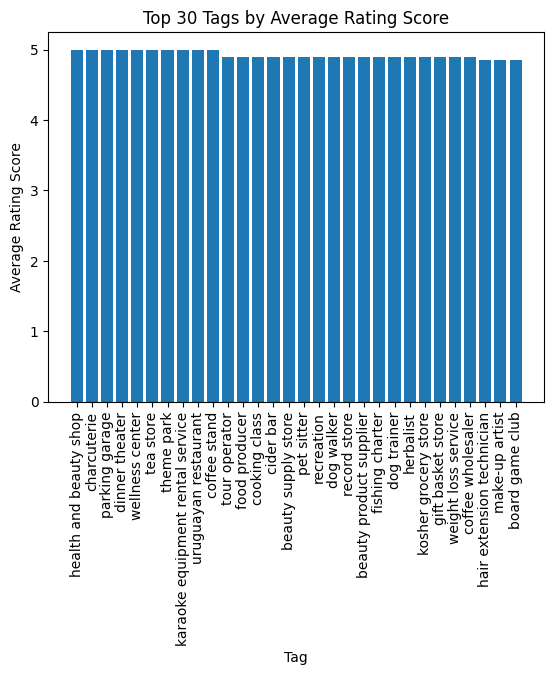

In [ ]:
# Sort the tags by average rating score and get the top 30
sorted_tags_by_rating = sorted(tag_stats.items(), key=lambda x: x[1]['avg_rating'], reverse=True)[:30]

# Generate a bar plot of the top 30 tags sorted by average rating score
tags_by_rating = [tag for tag, stats in sorted_tags_by_rating]
avg_rating_by_tag = [stats['avg_rating'] for tag, stats in sorted_tags_by_rating]
fig, ax = plt.subplots()
ax.bar(tags_by_rating, avg_rating_by_tag)
ax.set_title('Top 30 Tags by Average Rating Score')
ax.set_xlabel('Tag')
ax.set_ylabel('Average Rating Score')
plt.xticks(rotation=90)
plt.show()

Surprisingly, many of the categories with lower number of reviews appear in the list of categories with higer scores, such as:

+ Dinner theater
+ Theme park
+ Karaoke bars
+ Board club bar

So, it's highly likely that those categories have a reduced but faithful group of costumers.


Some other popular categories are related to training and a healthy lifestyle.

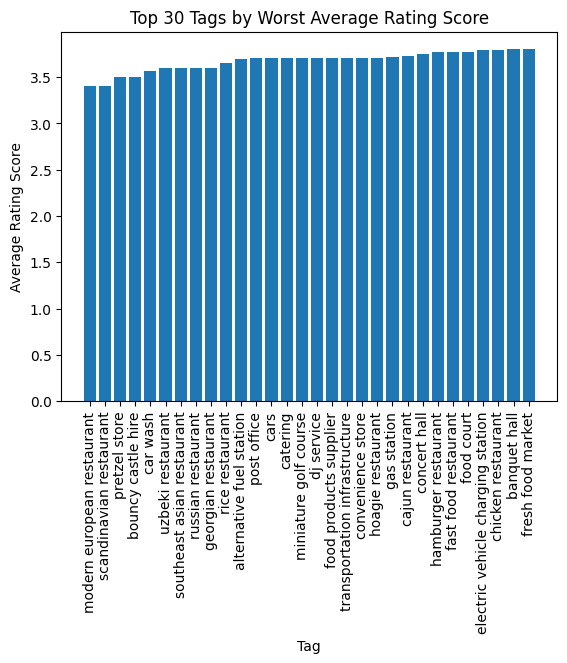

In [ ]:
# Sort the tags by average rating score and get the top 30
sorted_tags_by_rating = sorted(tag_stats.items(), key=lambda x: x[1]['avg_rating'], reverse=False)[:30]

# Generate a bar plot of the top 30 tags sorted by average rating score
tags_by_rating = [tag for tag, stats in sorted_tags_by_rating]
avg_rating_by_tag = [stats['avg_rating'] for tag, stats in sorted_tags_by_rating]
fig, ax = plt.subplots()
ax.bar(tags_by_rating, avg_rating_by_tag)
ax.set_title('Top 30 Tags by Worst Average Rating Score')
ax.set_xlabel('Tag')
ax.set_ylabel('Average Rating Score')
plt.xticks(rotation=90)
plt.show()

However, aligned with another observation, *European food restaurants* have few and upset costumers.

But, Sandwich restaurants have a high number of costumers, however, in average those shops do not have high rating scores. So, that may indicate that people find them useful but they are not always satisfied by the provided service.

#### Perpetualy Close categories

In [ ]:
# First, create a dictionary to store the number of rows with each tag and the state 'Permanently closed'
tag_closed_counts = {}
for tag in unique_tags:
    tag_closed_counts[tag] = 0

# Then, iterate over the rows in the df_gastronomic DataFrame and update the counters for each tag with the state 'Permanently closed'
for index, row in dfFlorida_gastronomic.iterrows():
    categories = row['category']
    state = row['state']
    if state == 'Permanently closed':
        for tag in categories:
            tag_closed_counts[tag] += 1


# Normalize with the total number of shops
for tag in tag_stats:
    count = all_tags.count(tag)
    tag_closed_counts[tag] = tag_closed_counts[tag] / count *100


# Finally, sort the tags by the number of rows with the state 'Permanently closed' and get the top 5
sorted_closed_tags = sorted(tag_closed_counts.items(), key=lambda x: x[1], reverse=True)[:15]


# Print the top 5 tags with the highest number of rows with the state 'Permanently closed'
for tag, count in sorted_closed_tags:
    print(tag, count)

Karaoke equipment rental service 100.0
Continental restaurant 100.0
Costume jewelry shop 100.0
DJ service 100.0
Israeli restaurant 100.0
Dance hall 100.0
Fruit parlor 100.0
Antique store 100.0
Art school 100.0
Bouncy castle hire 100.0
Modern French restaurant 100.0
Pet adoption service 100.0
Pet store 100.0
Modern British restaurant 100.0
Event planner 100.0


From the above list, some trends are reinforced:

+ Places with entertaiment are appreciated by their loyal costumers but there are only a few of them, so those shops are not profitable
+ European Food is not popular in Florida.

In [ ]:
# Finally, sort the tags by the number of rows with the state 'Permanently closed' and get the top 5
sorted_closed_tags = sorted(tag_closed_counts.items(), key=lambda x: x[1], reverse=False)[:15]


# Print the top 5 tags with the highest number of rows with the state 'Permanently closed'
for tag, count in sorted_closed_tags:
    print(tag, count)

Tennis club 0.0
Water sports equipment rental service 0.0
Biryani restaurant 0.0
Bingo hall 0.0
Chophouse restaurant 0.0
Spa 0.0
Charcuterie 0.0
Bowling club 0.0
Organic farm 0.0
Golf driving range 0.0
Mexican torta restaurant 0.0
Miniature golf course 0.0
Ice skating rink 0.0
Marine supply store 0.0
Wedding store 0.0
